In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

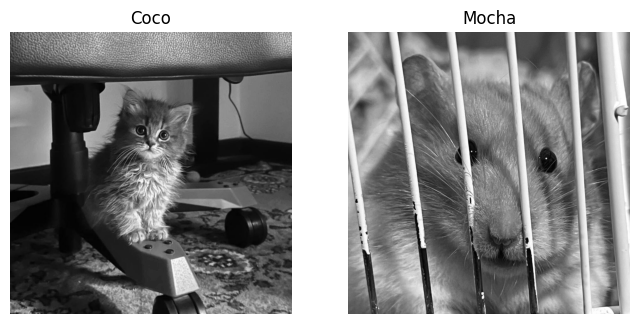

In [67]:
image1 = cv2.imread('coco.jpg')
image2 = cv2.imread('mocha.jpg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
d = [{'image': image1, 'title': 'Coco'}, {'image': image2, 'title': 'Mocha'}]
for i, x in enumerate(d):
    axes[i].imshow(x["image"], cmap='gray')
    axes[i].set_title(x["title"])
    axes[i].axis('off')
plt.show()

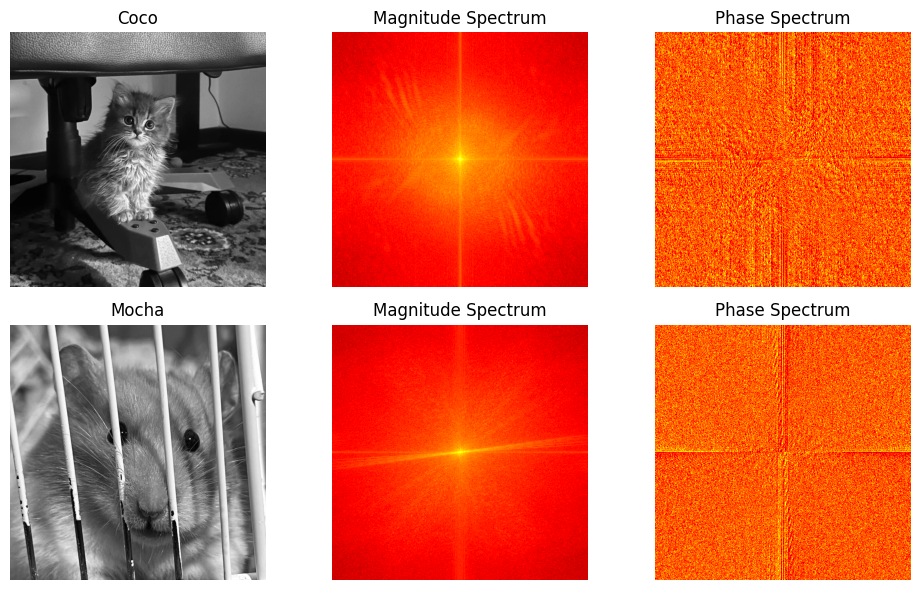

In [86]:
# fourier transform of image1
f1 = np.fft.fft2(image1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20*np.log(np.abs(fshift1))
phase_spectrum1 = np.angle(fshift1)

# fourier transform of image2
f2 = np.fft.fft2(image2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2))
phase_spectrum2 = np.angle(fshift2)

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
d = [{'image': image1, 'title': 'Coco'},
     {'image': magnitude_spectrum1, 'title': 'Magnitude Spectrum'},
     {'image': phase_spectrum1, 'title': 'Phase Spectrum'},
     {'image': image2, 'title': 'Mocha'},
     {'image': magnitude_spectrum2, 'title': 'Magnitude Spectrum'},
     {'image': phase_spectrum2, 'title': 'Phase Spectrum'}]
for i in range(2):
    for j in range(3):
        if j == 0:
            axes[i][j].imshow(d[i*3+j]["image"], cmap='gray')
        else:
            axes[i][j].imshow(d[i*3+j]["image"], cmap='hot')
        axes[i][j].set_title(d[i*3+j]["title"])
        axes[i][j].axis('off')
plt.tight_layout()
plt.show()


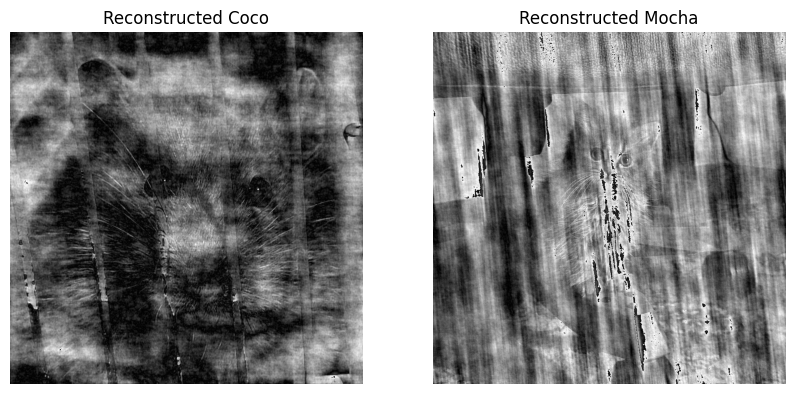

In [83]:
# reconstruct image1
magnitude1 = np.exp(magnitude_spectrum1 / 20)
complex_spectrum1 = magnitude1 * np.exp(1j * phase_spectrum2)
f_ishift_1 = np.fft.ifftshift(complex_spectrum1)
image_reconstructed1 = np.fft.ifft2(f_ishift_1)
image_reconstructed1 = np.abs(image_reconstructed1)
image_reconstructed1 = np.uint8(image_reconstructed1)

# reconstruct image2
magnitude2 = np.exp(magnitude_spectrum2 / 20)
complex_spectrum2 = magnitude2 * np.exp(1j * phase_spectrum1)
f_ishift_2 = np.fft.ifftshift(complex_spectrum2)
image_reconstructed2 = np.fft.ifft2(f_ishift_2)
image_reconstructed2 = np.abs(image_reconstructed2)
image_reconstructed2 = np.uint8(image_reconstructed2)


fig, axes = plt.subplots(1, 2, figsize=(10, 8))
d = [{'image': image_reconstructed1, 'title': 'Reconstructed Coco'},
     {'image': image_reconstructed2, 'title': 'Reconstructed Mocha'}]
for i, x in enumerate(d):
    axes[i].imshow(x["image"], cmap='gray')
    axes[i].set_title(x["title"])
    axes[i].axis('off')
plt.show()